In [1]:
from matplotlib import pyplot as plt

import numpy as np
from scipy.io import wavfile

π = np.pi

In [2]:
A = 440 # A4
C = A / 2 * 2**(3/12) # C4, or middle C

major_mask = [0, 2, 4, 5, 7, 9, 11, 12]
notes = np.array(['C', 'D♭', 'D', 'E♭', 'E', 'F', 'F♯', 'G', 'A♭', 'A', 'B♭', 'B', 'C'])

### Save intervals and frequencies

# https://en.wikipedia.org/wiki/Five-limit_tuning#Twelve-tone_scale (Symmetric scale 1)
just = np.array([1, 16/15, 9/8, 6/5, 5/4, 4/3, 45/32, 3/2, 8/5, 5/3, 9/5, 15/8, 2])

# https://en.wikipedia.org/wiki/Pythagorean_tuning#Method (drop Ab, following mean temperament below)
pyth = np.array([1, 256/243, 9/8, 32/27, 81/64, 4/3, 729/512, 3/2, 128/81, 27/16, 16/9, 243/128, 2])

# https://en.wikipedia.org/wiki/Quarter-comma_meantone#12-tone_scale (drop Ab in D tuning)
mean = np.array([1, 1.0700, 1.1180, 1.1963, 1.2500, 1.3375, 1.3975, 1.4953, 1.6000, 1.6719, 1.7889, 1.8692, 2])

# https://www.math.uwaterloo.ca/~mrubinst/tuning/tuning.html
well = np.array([1, 1.055730636, 1.119771437, 1.187696971, 1.253888072, 1.334745462, 1.407640848, 1.496510232, 1.583595961, 1.675749414, 1.781545449, 1.878842233, 2])

# https://en.wikipedia.org/wiki/Equal_temperament
equal = 2**(np.arange(0, 13)/12)

# tuning : (intervals, longname)
tunings = {
  "just" : (just, "Just intonation"),
  "pyth" : (pyth, "Pythagorean tuning"),
  "mean" : (mean, "Meantone temperament"),
  "well " : (well, "Well temperament"),
  "equal" : (equal, "Equal temperament"),
}
num_tunings = len(tunings)

In [3]:
def shift_notes(step=1):
  if not isinstance(step, int):
    raise ValueError(f"step {step} was not an int")
  if step < 1:
    raise ValueError(f"step {step} was less than 1")

  shifted_notes = np.full_like(notes, '')
  shifted_notes[: - step] = notes[step :]
  shifted_notes[- step :] = notes[1 : step + 1]

  return shifted_notes

def shift_intervals(intervals, step=1):
  if step < 1:
    return intervals.copy()
  
  shifted = np.zeros_like(intervals)
  shifted[: - step] = intervals[step :]
  shifted[- step :] = intervals[1 : step + 1] * 2

  return shifted

# Ideas

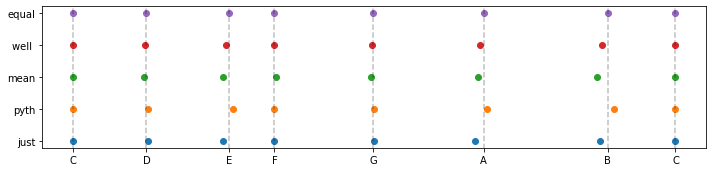

In [4]:
### Intervals of original C major scale

fig, ax = plt.subplots(1, 1, figsize=(10, 2.5))

[ax.scatter(intervals[major_mask], [i] * 8, label=label) for i, (label, (intervals, longname)) in enumerate(tunings.items())]
ax.set_xticks(tunings["equal"][0][major_mask], notes[major_mask])
ax.set_yticks(range(num_tunings), tunings.keys())

pad = 0.2
ax.set_ylim(- pad, num_tunings - 1 + pad)

ax.vlines(tunings["equal"][0][major_mask], - 1, num_tunings, colors="black", linestyles="--", alpha=0.25)

fig.tight_layout()
fig.show()

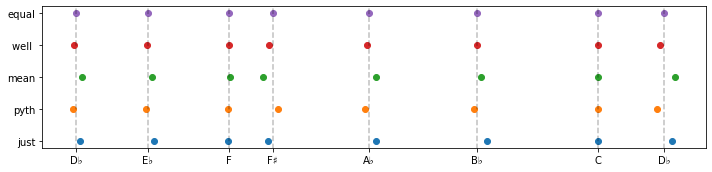

In [5]:
### Intervals of Db major scale

step = 1

shifted_notes = shift_notes(step)

fig, ax = plt.subplots(1, 1, figsize=(10, 2.5))

for i, (label, (intervals, longname)) in enumerate(tunings.items()):
  shifted = shift_intervals(intervals, step)
  ax.scatter(shifted[major_mask], [i] * 8, label=label)

ticks = shifted[major_mask]
ax.set_xticks(ticks, shifted_notes[major_mask])
ax.set_yticks(range(num_tunings), tunings.keys())

pad = 0.2
ax.set_ylim(- pad, num_tunings - 1 + pad)

ax.vlines(ticks, - 1, num_tunings, colors="black", linestyles="--", alpha=0.25)

fig.tight_layout()
fig.show()

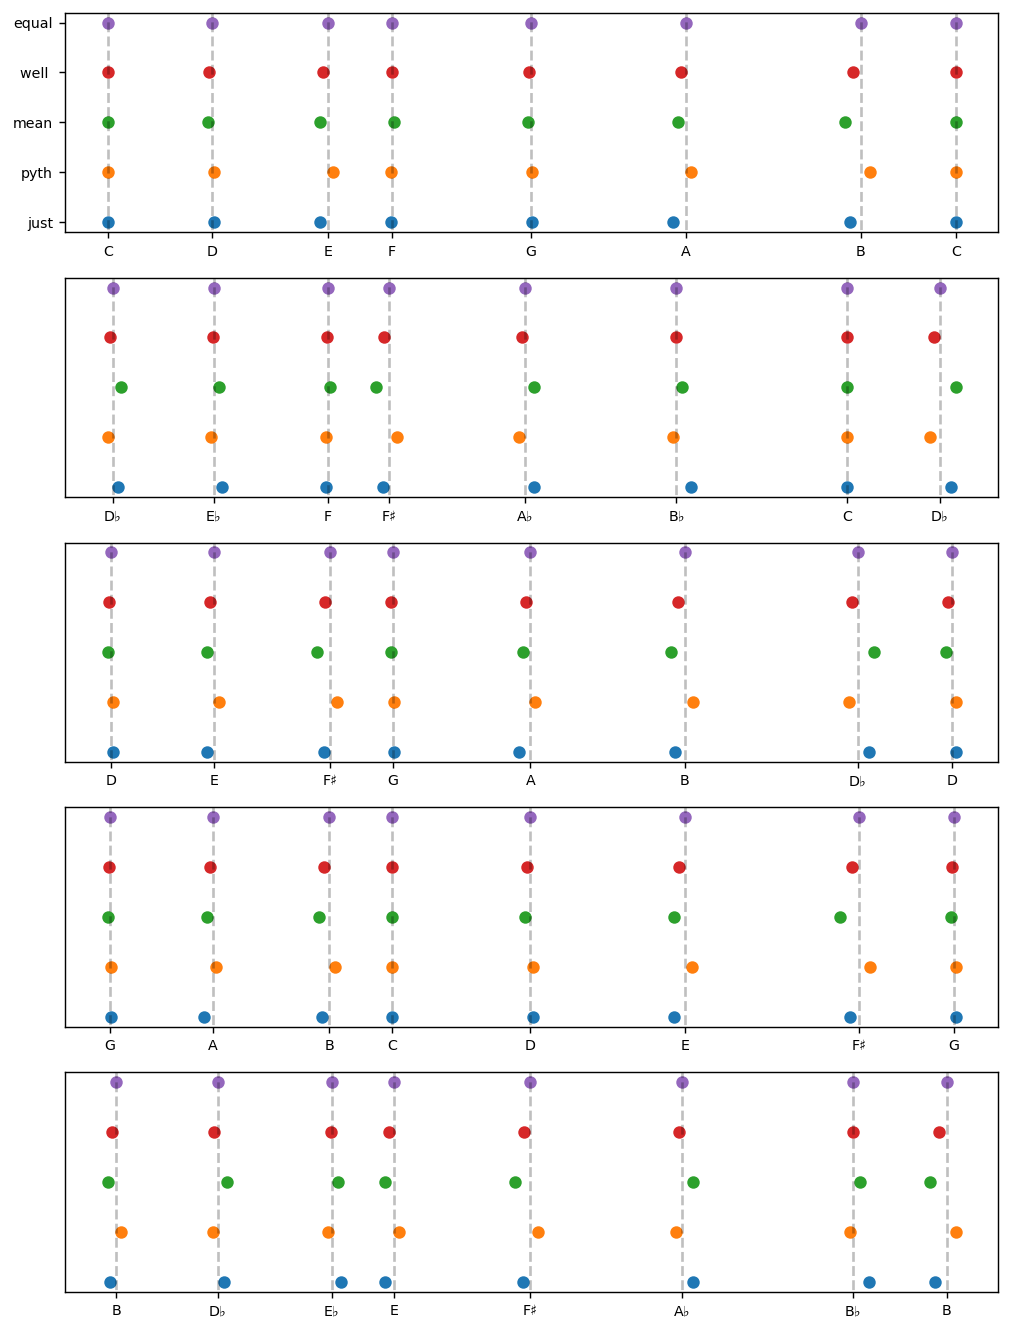

In [6]:
steps = (0, 1, 2, 7, 11)

fig, axs = plt.subplots(len(steps), 1, figsize=(8, 10.5), dpi=128)

xlabel_fontsize = 8
ylabel_fontsize = 8

for ax, step in zip(axs, steps):
  if step != 0:
    shifted_notes = shift_notes(step)
    ax.get_yaxis().set_visible(False)
  else:
    shifted_notes = notes.copy()
    ax.set_yticks(range(num_tunings), tunings.keys(), fontsize=ylabel_fontsize)

  for i, (label, (intervals, longname)) in enumerate(tunings.items()):
    shifted = shift_intervals(intervals, step)
    
    ax.scatter(shifted[major_mask], [i] * 8, label=label)

  ticks = shifted[major_mask]
  ax.set_xticks(ticks, shifted_notes[major_mask], fontsize=xlabel_fontsize)

  pad = 0.2
  ax.set_ylim(- pad, num_tunings - 1 + pad)

  ax.vlines(ticks, - 1, num_tunings, colors="black", linestyles="--", alpha=0.25)

fig.tight_layout()
fig.show()

# Working

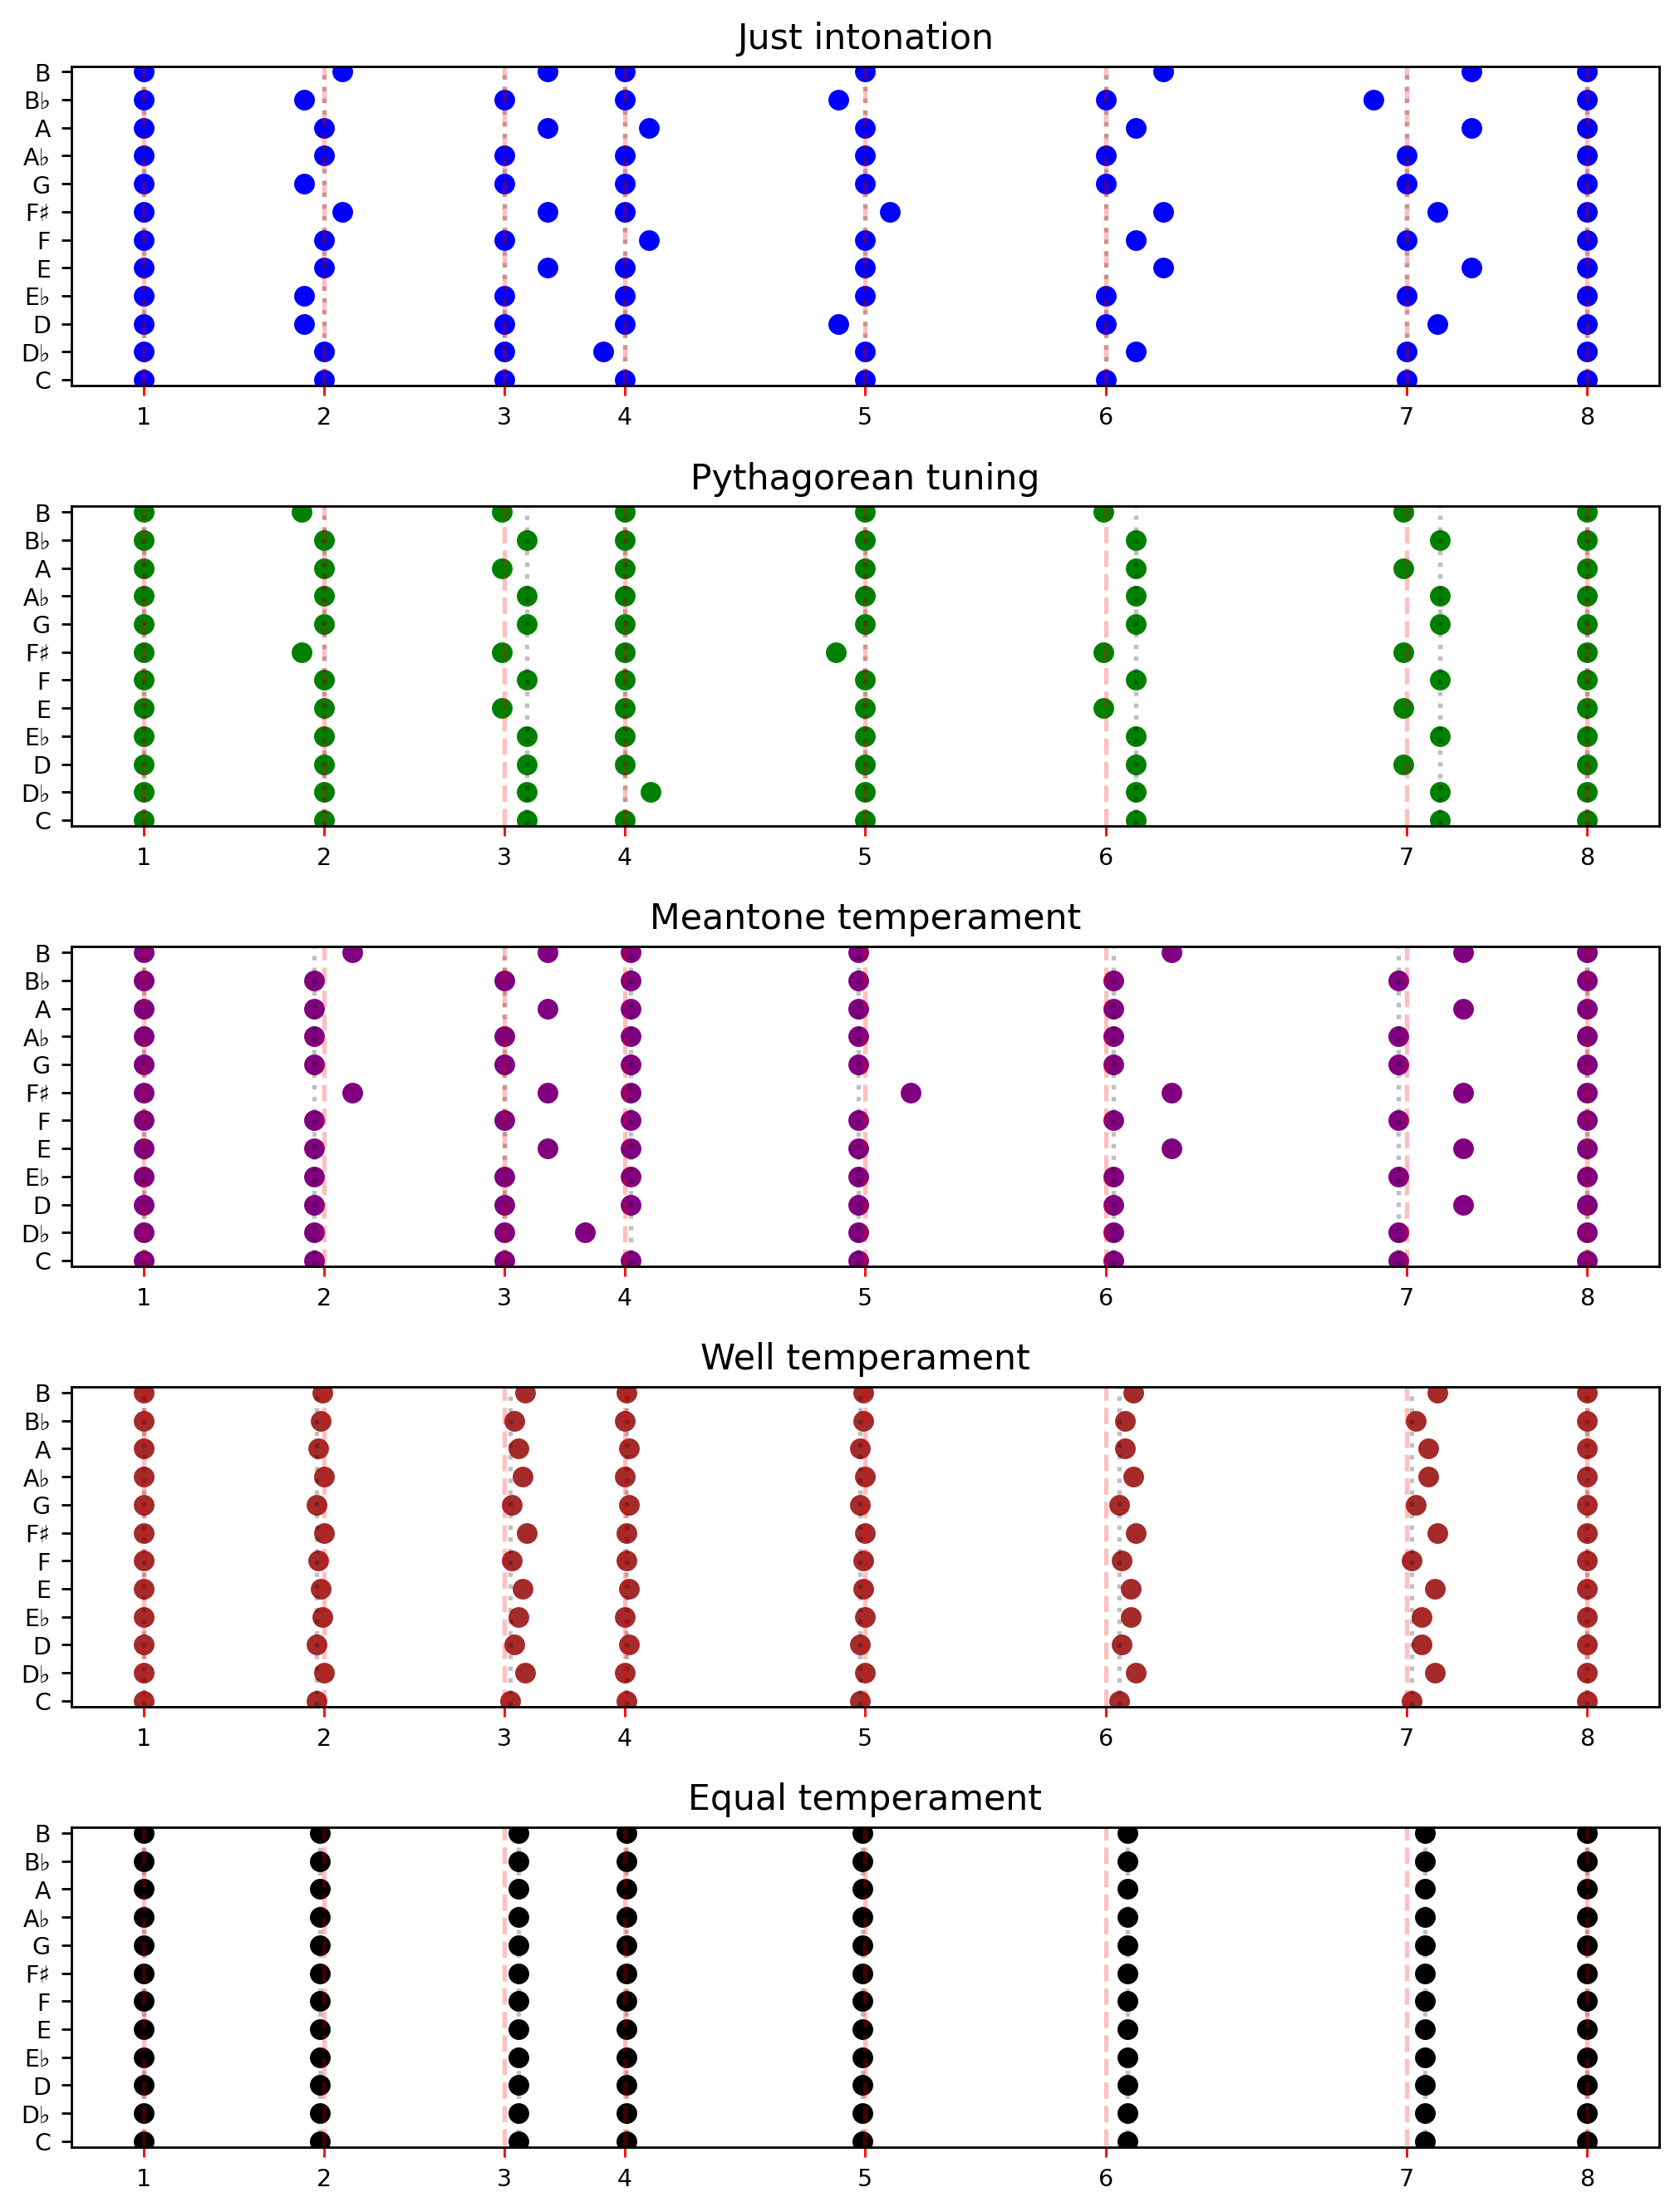

In [12]:
steps = np.arange(12)
num_steps = len(steps)

xlabel_fontsize = 8
ylabel_fontsize = 8
just_color = "red"

colors = ("blue", "green", "purple", "brown", "black")

filename = "tuning-comparison.png"

fig, axs = plt.subplots(len(tunings), 1, figsize=(8, 10.5), dpi=256)

just_intervals = tunings["just"][0][major_mask]
for ax, color, (label, (intervals, longname)) in zip(axs, colors, tunings.items()):
  for i, step in enumerate(steps):
    tonic = notes[step]

    shifted = shift_intervals(intervals, step)
    shifted /= shifted[0]
    
    ax.scatter(shifted[major_mask], [i] * 8, label=tonic, color=color)

  ax.set_title(longname)
  ax.set_xticks(just_intervals, range(1, 9), fontsize=xlabel_fontsize)
  ax.tick_params(axis='x', color=just_color)
  ax.set_yticks(range(num_steps), notes[steps], fontsize=ylabel_fontsize)

  pad = 0.2
  ax.set_ylim(- pad, num_steps - 1 + pad)

  ax.vlines(intervals[major_mask], - 1, num_steps + 1, colors="black", linestyles=":", alpha=0.25)
  ax.vlines(just_intervals, -1, num_steps + 1, colors=just_color, linestyles="--", alpha=0.25)

fig.tight_layout()
fig.show()

fig.savefig(filename)

In [8]:
sample_rate = 44100
amplitude = np.iinfo(np.int16).max

def generate_chord(freqs: list[float], duration: float):
  """
  freqs : iterable of frequencies
  duration : seconds
  """
  num_samples = int(sample_rate * duration)
  tls = np.linspace(0, duration, num_samples, endpoint=False)

  # Sum frequencies
  waveform = np.sum([np.sin(2*π * freq * tls) for freq in freqs], axis=0)

  # Normalize to have peak amplitude 1
  return waveform / max(abs(waveform))

def save_chord(waveform: np.ndarray, filename: str):
  """
  chord : sound samples, normalized to have peak amplitude 1
  """
  wavfile.write(filename, sample_rate, (waveform * amplitude).astype(np.int16))

def gen_save_chord(freqs: list[float], duration: float, filename: str):
  """
  freqs : iterable of frequencies
  duration : seconds
  """
  waveform = generate_chord(freqs, duration)
  save_chord(waveform, filename)

In [9]:
def compare_chords(duration: float, step: int, interval: str, chord_idx: list):
  print("chord:", notes[chord_idx])
  print()

  ### Just temperament
  print("just temperament")
  intervals = tunings["mean"][0]
  # tonic C
  chord_intervals = intervals[chord_idx]
  freqs = chord_intervals * C
  print("tonic:", notes[step])
  print("intervals:", chord_intervals)
  print("freqs:", freqs)
  gen_save_chord(freqs, duration, f"{interval}-just-C.mp3")
  print()

  # tonic E, rescaled to C
  shifted = shift_intervals(intervals, step)
  shifted /= shifted[0]

  chord_intervals = shifted[chord_idx]
  freqs = chord_intervals * C
  print("tonic:", notes[step])
  print("intervals:", chord_intervals)
  print("freqs:", freqs)
  gen_save_chord(freqs, duration, f"{interval}-just-{notes[step]}.mp3")
  print()

  ### Equal temperament
  print("equal temperament")
  intervals = tunings["equal"][0]
  # tonic C
  chord_intervals = intervals[chord_idx]
  freqs = chord_intervals * C
  print("tonic:", notes[0])
  print("intervals:", chord_intervals)
  print("freqs:", freqs)
  gen_save_chord(freqs, duration, f"{interval}-equal-c.mp3")
  print()

In [10]:
duration = 3

chord_idx = [0, 4]
interval = "third"
step = 4
compare_chords(duration, step, interval, chord_idx)

chord_idx = [0, 9]
interval = "sixth"
step = 4
compare_chords(duration, step, interval, chord_idx)

chord: ['C' 'E']

just temperament
tonic: E
intervals: [1.   1.25]
freqs: [261.6255653  327.03195663]

tonic: E
intervals: [1.   1.28]
freqs: [261.6255653  334.88072358]

equal temperament
tonic: C
intervals: [1.         1.25992105]
freqs: [261.6255653  329.62755691]

chord: ['C' 'A']

just temperament
tonic: E
intervals: [1.     1.6719]
freqs: [261.6255653  437.41178263]

tonic: E
intervals: [1.    1.712]
freqs: [261.6255653  447.90296779]

equal temperament
tonic: C
intervals: [1.         1.68179283]
freqs: [261.6255653 440.       ]

